In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
plt.figure(figsize=(60,60))

<Figure size 4320x4320 with 0 Axes>

<Figure size 4320x4320 with 0 Axes>

In [2]:
df = pd.read_excel('data.xlsx',index_col=0)
df

,PUISS,ROT_PRIX,CO2,INFOMEDIAIRE_CARROSSERIE,INFOMEDIAIRE_BOITE,NBJ_STK,SPOT_PRICE,Month,CARB,MARQUE,KMS,PRIX_VTE_TTC,HITS
0,5,25,104,BERLINE,MANUELLE,261,7830,1,D,RENAULT,84461,7999,0
1,5,26,104,BERLINE,MANUELLE,262,7830,1,D,RENAULT,84461,7999,0
2,5,27,104,BERLINE,MANUELLE,263,7830,1,D,RENAULT,84461,7999,0
3,5,0,104,BERLINE,MANUELLE,264,7830,1,D,RENAULT,84461,7989,0
4,5,1,104,BERLINE,MANUELLE,265,7830,1,D,RENAULT,84461,7989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595732,8,12,140,Autre,Autre,69,14000,10,E,OPEL,36862,13740,0
595733,8,13,140,Autre,Autre,70,14000,10,E,OPEL,36862,13740,0
595734,8,14,140,Autre,Autre,71,14000,10,E,OPEL,36862,13740,0
595735,8,15,140,Autre,Autre,72,14000,10,E,OPEL,36862,13740,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595737 entries, 0 to 595736
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   PUISS                     595737 non-null  int64 
 1   ROT_PRIX                  595737 non-null  int64 
 2   CO2                       595737 non-null  int64 
 3   INFOMEDIAIRE_CARROSSERIE  595737 non-null  object
 4   INFOMEDIAIRE_BOITE        595737 non-null  object
 5   NBJ_STK                   595737 non-null  int64 
 6   SPOT_PRICE                595737 non-null  int64 
 7   Month                     595737 non-null  int64 
 8   CARB                      595737 non-null  object
 9   MARQUE                    595737 non-null  object
 10  KMS                       595737 non-null  int64 
 11  PRIX_VTE_TTC              595737 non-null  int64 
 12  HITS                      595737 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 63.6+ MB


In [4]:
def oneHotEncoding_with_names(columnName):
    
    temp_df = pd.get_dummies(df[columnName],drop_first=True)
    for x in temp_df.columns:
        temp_df.rename(columns={x:columnName+'_'+str(x)},inplace=True)
    
    for x in temp_df.columns:
        df[x] = temp_df[x]
    
    df.drop(labels=columnName,axis=1,inplace=True)
    return df

for y in df.columns:
    if(df[y].dtype==object):
        oneHotEncoding_with_names(y)
        
df

,PUISS,ROT_PRIX,CO2,NBJ_STK,SPOT_PRICE,Month,KMS,PRIX_VTE_TTC,HITS,INFOMEDIAIRE_CARROSSERIE_Autre,INFOMEDIAIRE_CARROSSERIE_BERLINE,INFOMEDIAIRE_CARROSSERIE_BREAK,INFOMEDIAIRE_CARROSSERIE_CABRIOLET,INFOMEDIAIRE_CARROSSERIE_CAMIONNETTE,INFOMEDIAIRE_CARROSSERIE_CITADINE,INFOMEDIAIRE_CARROSSERIE_COUPE,"INFOMEDIAIRE_CARROSSERIE_CROSSOVER, SUV",INFOMEDIAIRE_CARROSSERIE_MINIBUS,INFOMEDIAIRE_CARROSSERIE_MONOSPACE,INFOMEDIAIRE_CARROSSERIE_PICK-UP,INFOMEDIAIRE_CARROSSERIE_UTILITAIRE,INFOMEDIAIRE_CARROSSERIE_VAN,INFOMEDIAIRE_BOITE_Autre,INFOMEDIAIRE_BOITE_MANUELLE,INFOMEDIAIRE_BOITE_SEMI-AUTOMATIQUE,INFOMEDIAIRE_BOITE_SEQUENTIELLE,CARB_E,CARB_G,CARB_H,CARB_W,MARQUE_ALFA ROMEO,MARQUE_AUDI,MARQUE_BMW,MARQUE_CHEVROLET,MARQUE_CITROEN,MARQUE_DACIA,MARQUE_DS,MARQUE_FIAT,MARQUE_FORD,MARQUE_HONDA,MARQUE_HYUNDAI,MARQUE_INFINITI,MARQUE_ISUZU,MARQUE_IVECO,MARQUE_JAGUAR,MARQUE_JEEP,MARQUE_KIA,MARQUE_LANCIA,MARQUE_LAND ROVER,MARQUE_LEXUS,MARQUE_MAZDA,MARQUE_MERCEDES,MARQUE_MINI,MARQUE_MITSUBISHI,MARQUE_NISSAN,MARQUE_OPEL,MARQUE_PEUGEOT,MARQUE_PORSCHE,MARQUE_RENAULT,MARQUE_SEAT,MARQUE_SKODA,MARQUE_SMART,MARQUE_SSANGYONG,MARQUE_SUBARU,MARQUE_SUZUKI,MARQUE_TESLA,MARQUE_TOYOTA,MARQUE_VOLKSWAGEN,MARQUE_VOLVO
0,5,25,104,261,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,26,104,262,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5,27,104,263,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0,104,264,7830,1,84461,7989,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1,104,265,7830,1,84461,7989,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595732,8,12,140,69,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595733,8,13,140,70,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595734,8,14,140,71,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595735,8,15,140,72,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


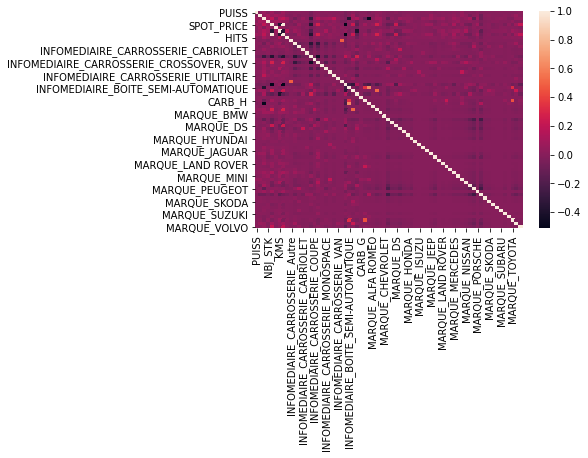

In [5]:
correlation_data = df.corr()
sns.heatmap(correlation_data)

In [6]:
#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data.columns
index = 0;

for x in correlation_data['HITS'].tolist():
    if(x >= -0.1 and x <=0.1):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['CO2', 'KMS', 'HITS']

In [11]:
features = df[['CO2', 'KMS']]
target = df[['HITS']]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [22]:
reg = LinearRegression()
model = cross_validate(reg,features,target, cv=20,return_estimator=True,scoring='r2')
model

{'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()),
 'fit_time': array([0.07483673, 0.06781983, 0.06582236, 0.06682611, 0.066818  ,
        0.08074641, 0.07679081, 0.07483125, 0.07084656, 0.06977534,
        0.06682205, 0.07875872, 0.0907557 , 0.08876085, 0.08178139,
        0.0797863 , 0.08377695, 0.07778955, 0.0847733 , 0.08177185]),
 'score_time': array([0.0049839 , 0.00395012, 0.00402236, 0.00399041, 0.00398827,
        0.0040195 , 0.00395775, 0.004987  , 0.00395226, 0.00601792,
        0.00402069, 0.00399041, 0.00698328, 0.00798464, 0.00498748,
        0.00399303, 0.00398922, 0.00399089

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
model = cross_validate(regressor,features,target, cv=20,return_estimator=True)
model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

{'estimator': (RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor(),
  RandomForestRegressor()),
 'fit_time': array([71.63048506, 71.73119187, 69.17403054, 70.39475894, 70.42667246,
        67.64810395, 69.51010275, 69.81831622, 69.20100546, 67.97622919,
        69.97587919, 67.15639567, 67.98202229, 69.050318  , 67.23001814,
        68.01453161, 69.12727237, 68.25871301, 67.28003907, 66.60502434]),
 'score_time': array([0.43982267, 0.4229002 , 0.40691209, 0.4408226 , 0.46475911,
        0.40694761, 0.39793587, 0.33211517, 0.38298082, 0.

In [24]:
df

,PUISS,ROT_PRIX,CO2,NBJ_STK,SPOT_PRICE,Month,KMS,PRIX_VTE_TTC,HITS,INFOMEDIAIRE_CARROSSERIE_Autre,INFOMEDIAIRE_CARROSSERIE_BERLINE,INFOMEDIAIRE_CARROSSERIE_BREAK,INFOMEDIAIRE_CARROSSERIE_CABRIOLET,INFOMEDIAIRE_CARROSSERIE_CAMIONNETTE,INFOMEDIAIRE_CARROSSERIE_CITADINE,INFOMEDIAIRE_CARROSSERIE_COUPE,"INFOMEDIAIRE_CARROSSERIE_CROSSOVER, SUV",INFOMEDIAIRE_CARROSSERIE_MINIBUS,INFOMEDIAIRE_CARROSSERIE_MONOSPACE,INFOMEDIAIRE_CARROSSERIE_PICK-UP,INFOMEDIAIRE_CARROSSERIE_UTILITAIRE,INFOMEDIAIRE_CARROSSERIE_VAN,INFOMEDIAIRE_BOITE_Autre,INFOMEDIAIRE_BOITE_MANUELLE,INFOMEDIAIRE_BOITE_SEMI-AUTOMATIQUE,INFOMEDIAIRE_BOITE_SEQUENTIELLE,CARB_E,CARB_G,CARB_H,CARB_W,MARQUE_ALFA ROMEO,MARQUE_AUDI,MARQUE_BMW,MARQUE_CHEVROLET,MARQUE_CITROEN,MARQUE_DACIA,MARQUE_DS,MARQUE_FIAT,MARQUE_FORD,MARQUE_HONDA,MARQUE_HYUNDAI,MARQUE_INFINITI,MARQUE_ISUZU,MARQUE_IVECO,MARQUE_JAGUAR,MARQUE_JEEP,MARQUE_KIA,MARQUE_LANCIA,MARQUE_LAND ROVER,MARQUE_LEXUS,MARQUE_MAZDA,MARQUE_MERCEDES,MARQUE_MINI,MARQUE_MITSUBISHI,MARQUE_NISSAN,MARQUE_OPEL,MARQUE_PEUGEOT,MARQUE_PORSCHE,MARQUE_RENAULT,MARQUE_SEAT,MARQUE_SKODA,MARQUE_SMART,MARQUE_SSANGYONG,MARQUE_SUBARU,MARQUE_SUZUKI,MARQUE_TESLA,MARQUE_TOYOTA,MARQUE_VOLKSWAGEN,MARQUE_VOLVO
0,5,25,104,261,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,26,104,262,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5,27,104,263,7830,1,84461,7999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0,104,264,7830,1,84461,7989,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1,104,265,7830,1,84461,7989,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595732,8,12,140,69,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595733,8,13,140,70,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595734,8,14,140,71,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
595735,8,15,140,72,14000,10,36862,13740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df.to_csv('preprocessedData.csv',index=False)

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
regxg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
model = cross_validate(regxg,features,target, cv=20,return_estimator=True,scoring='r2')
model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vecto

{'estimator': (Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('sgdregressor', SGDRegressor())]